In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import rho_plus as rp

theme, cs = rp.mpl_setup(is_dark=True)

# Colormaps for Quantitative Data

Many data visualizations use color to encode continuous numeric data. Existing Python visualization libraries like `matplotlib`, `seaborn`, `plotly`, and `bokeh` all have different colormaps for this purpose. Rho+ has its own set of palettes. 

Why have custom palettes when so many already exist? There are a couple reasons:

 - Rho+ has color palettes that fill gaps in the palettes offered by some major plotting libraries.
 - Rho+ has a specific emphasis on color palettes that work well in both dark and light color modes, which many existing libraries do not.
 - Rho+ palettes can be converted to the formats that other libraries use, which enables cohesive aesthetics across many Python tools.

[Matplotlib](https://matplotlib.org/stable/tutorials/colors/colormaps.html) and [Seaborn](https://seaborn.pydata.org/tutorial/color_palettes.html) have excellent primers on color palettes. This library also takes inspiration from [Colorcet](https://colorcet.holoviz.org/index.html). Those pages are highly recommended reading for the data visualization practitioner.

## TL;DR What Should I Use?

If you just want a solid default, there are three aliases that map to a good default for the current light/dark mode setting.

- If you're coloring points or lines that need to stand out against a background, and your data is ordered, use `sequential`.
- If you have a natural center to your data, use `diverging`.
- If you're coloring the plot background, like a heatmap or choropleth map, use `heatmap`.

## Using Colormaps

Rho+ registers all of its colormaps into Matplotlib with the prefix `rho_`, so if you want to use the Rho+ colormap `inferna` that is available as `palette='rho_inferna'`. As is standard, appending `_r` reverses the colormap: `palette='rho_inferna_r'`.

The more convenient interface, however, by using the module's namespace. If you have `import rho_plus as rp`, then you can access the Matplotlib palette for `inferna` at `rp.mpl_inferna`, which should tab-complete for ease of use. If you just want the list of colors, which is the format that many other visualization libraries expect, that's available under `rp.list_inferna`. As above, `_r` reverses each colormap.

## Evaluating Colormaps

The main resource on colormap design used for this library is a paper by Peter Kovesi, [*Good Colour Maps: How to Design Them*.](https://doi.org/10.48550/arXiv.1509.03700) One tool used in the paper that we will use to evaluate sequential colormaps is the following sine-comb image (borrowed from `colorcet`):

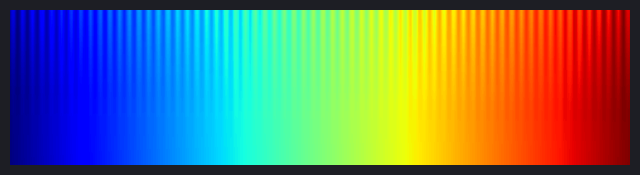

In [2]:
def teeth_plot(palette):
    plt.imshow(plt.imread('colourmaptest.tif'), cmap=palette)
    plt.gca().set_axis_off()

teeth_plot('jet')

This image is most effective when used at a normal viewing distance on a computer monitor.

There are a couple things to look for when evaluating a colormap using this image:
 - The periodic variation in the numbers being plotted is perfectly even, so when plotted using a colormap all of the "teeth" should appear equally long. We can see here that the `jet` colormap exaggerates variation around light blue and orange and minimizes perceived distances in the middle green area.
 - The longer the teeth look, the more that small variations in plotted data will be visible. Ideally we want as much resolution as is possible given the constraints of our environment. `jet` has quite good resolution in some areas, but it is still unusable as a serious colormap due to its inconsistency.
 - Ideally our colormaps are distinguishable for colorblind users. Jet has serious issues with this. Most Rho+ palettes are colorblind-safe: the ones that aren't are marked as such below.

## Sequential Colormaps

These are colormaps that can represent a single numerical axis—from low to high. An example use case would be showing the body mass of the penguins displayed in the scatterplot below.

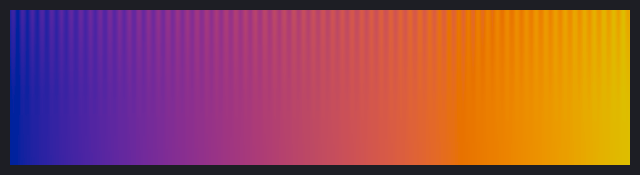

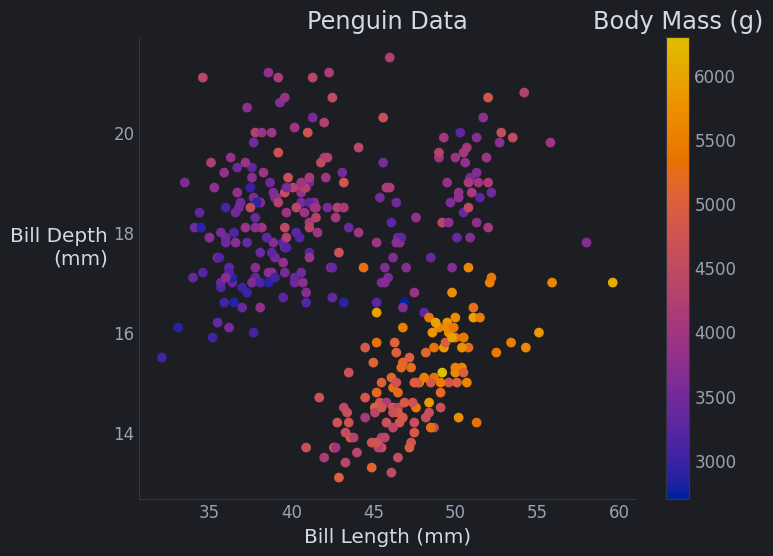

In [3]:
pg = sns.load_dataset('penguins')

def scatterplot(palette):
    plt.scatter(data=pg, x='bill_length_mm', y='bill_depth_mm', c='body_mass_g', cmap=palette)
    plt.xlabel('Bill Length (mm)')
    plt.ylabel('Bill Depth\n(mm)', rotation='horizontal', ha='right')
    plt.title('Penguin Data')
    clb = plt.colorbar()
    clb.ax.set_title('Body Mass (g)')

teeth_plot(rp.mpl_inferna)
plt.show()
scatterplot(rp.mpl_inferna)

This is `inferna`, Rho+'s version of matplotlib's `inferno`. 

 - Like `inferno`, the color palette is approximately perceptually uniform: the teeth are about equally long.
 - `inferna` also retains the same good resolution. Note how you can clearly see that, within the separate clusters (different species of penguin), we can see that body mass increases along with bill depth and length.

Unlike `inferno`, `inferna` has a smaller range of lightness values, which makes it suitable for scatterplots on dark or light backgrounds. Compare `inferno` to see how it isn't suitable for plotting on a dark background:

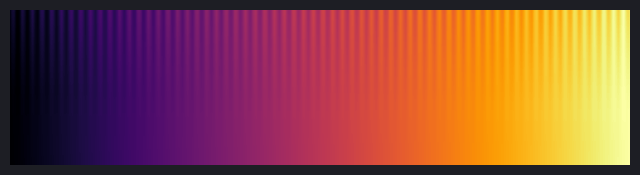

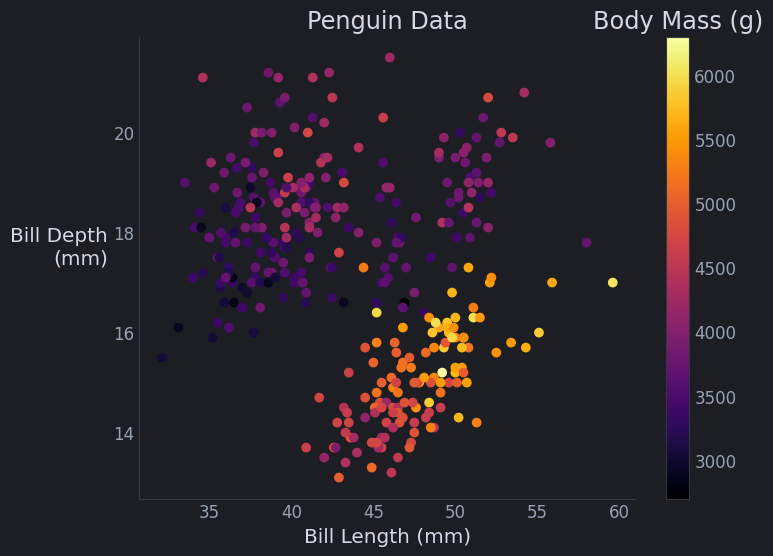

In [4]:
with plt.style.context(rp.mpl_setup(True, False)[0]):
    teeth_plot('inferno')
    plt.show()
    scatterplot('inferno')

The other major sequential palette in Rho+ is `viridia`, a version of `viridis` that also maintains a smaller total range of lightness variation.

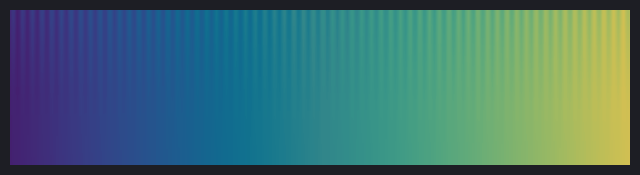

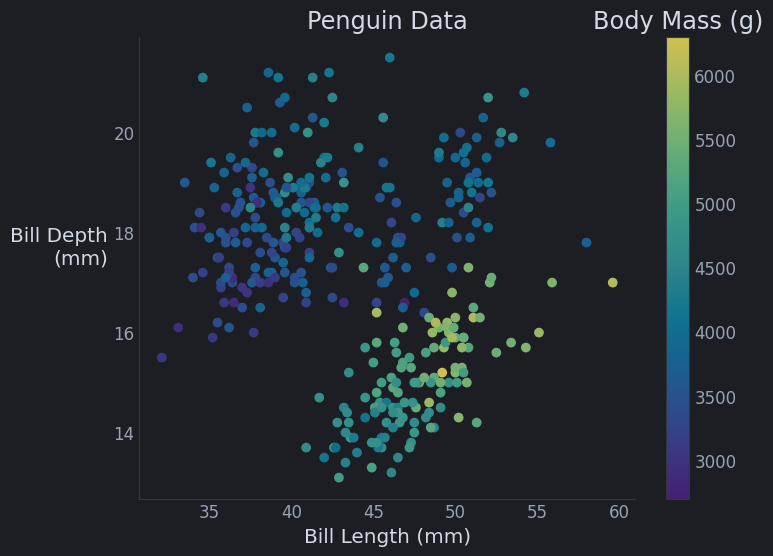

In [5]:
teeth_plot(rp.mpl_viridia)
plt.show()
scatterplot(rp.mpl_viridia)

Both of these palettes are good workhorses. They're suitable for dark or light backgrounds, as their own background in a heatmap or choropleth map, and for users with common forms of colorblindness. If you don't know what palette to use, and you have data that goes from low to high, it's hard to go wrong with either one.

As a general rule, the highest values of the colormap should have the most contrast with the background. Every sequential colormap is default dark-to-light, but that's less appropriate on light backgrounds. Consider using the reversed version for those:

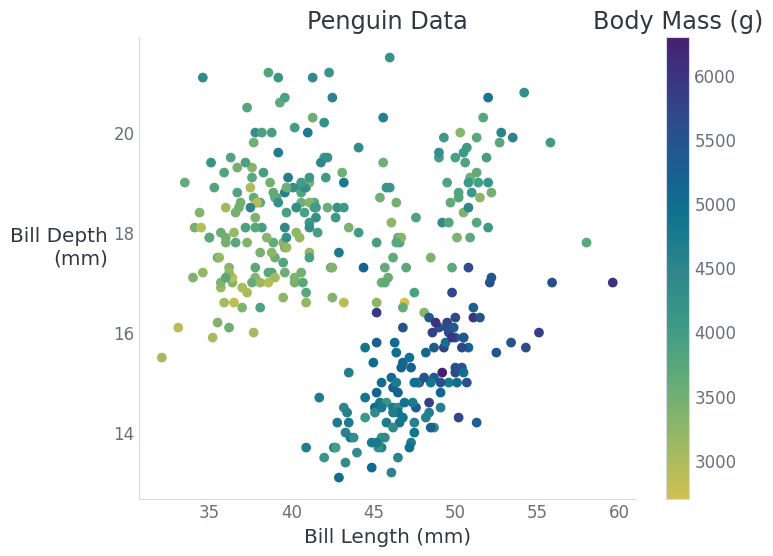

In [6]:
with plt.style.context(rp.mpl_setup(False)[0]):
    scatterplot('rho_viridia_r')

If you use `rho_sequential`, it deals with this for you.

### Palettes for Heatmaps, Images, and Choropleth Maps

When colors are being shown against a background, like in scatterplots, there's a tighter range of lightness values that are easily visible. When this restriction is lifted, because the colors *are* the background, it opens up more space for palettes to communicate the data more precisely. As such, Rho+ has several palettes specifically designed for these use cases.

As with scatterplots, the most important elements should ideally contrast with the background. This introduces an asymmetry: ideally, heatmaps against a light background should go from an unsaturated light color to a saturated dark one and vice versa. Because of that, Rho+ offers colormaps for both light and dark backgrounds that aren't simple reverses of each other: prefer them over the reversed versions.

For light backgrounds, `lava` offers a map roughly akin to `magma`:

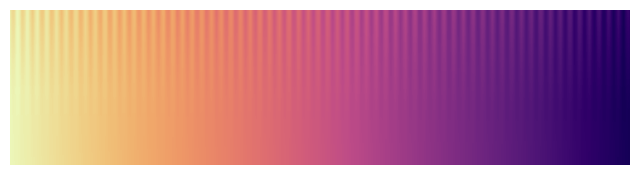

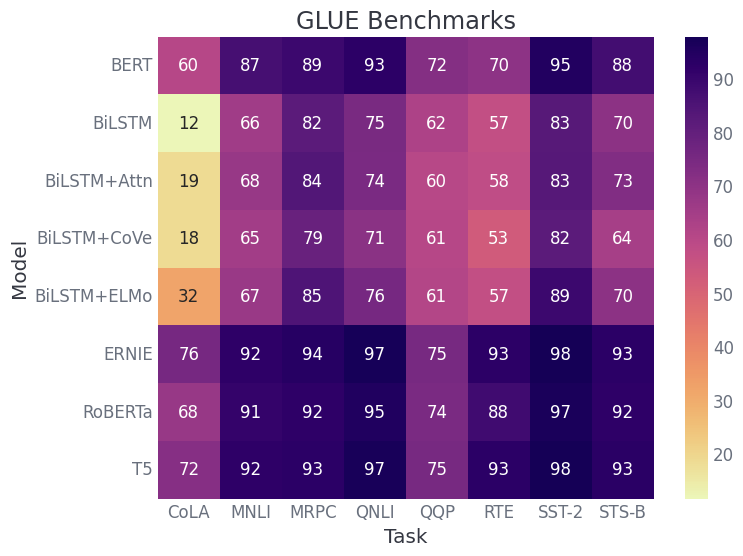

In [7]:
glue = sns.load_dataset('glue').pivot_table('Score', 'Model', 'Task')
def heatmap_plot(palette, annot=True):
    sns.heatmap(glue, annot=annot, fmt='.0f', cmap=palette)
    plt.title('GLUE Benchmarks')

with plt.style.context(rp.mpl_setup(False, False)[0]):
    teeth_plot(rp.mpl_lava)
    plt.show()
    heatmap_plot(rp.mpl_lava)

By going the other way on the color wheel, you get `cabana`, which can be used in the same situations:

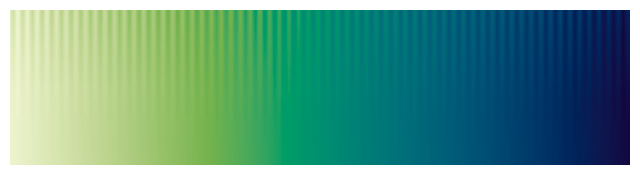

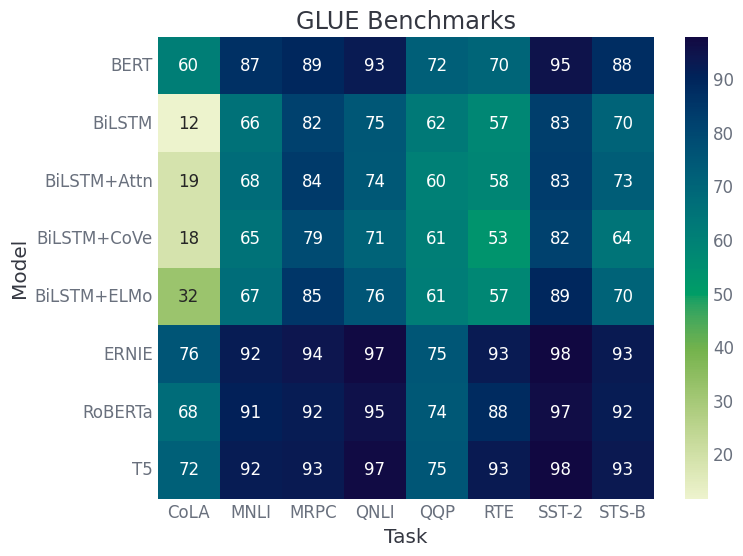

In [8]:
with plt.style.context(rp.mpl_setup(False, False)[0]):
    teeth_plot(rp.mpl_cabana)
    plt.show()
    heatmap_plot(rp.mpl_cabana)

With a dark background, you can use `candela` instead of `lava`. A deep saturated yellow is a bit garish, so the top end of the colormap is desaturated a little.

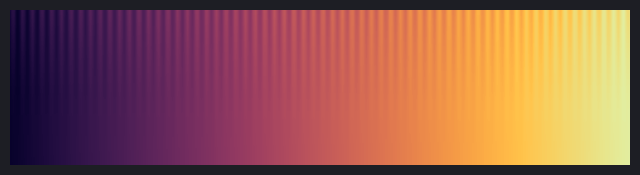

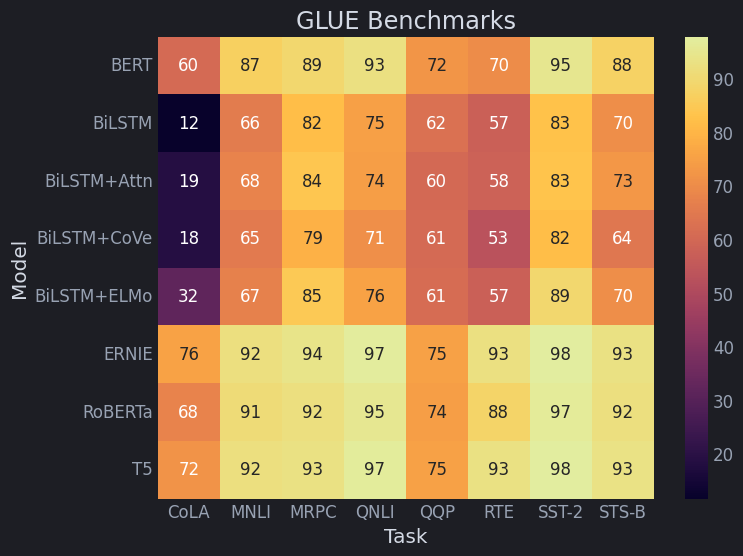

In [9]:
with plt.style.context(rp.mpl_setup(True, False)[0]):
    teeth_plot(rp.mpl_candela)
    plt.show()
    heatmap_plot(rp.mpl_candela)

The counterpart to `cabana` is `aquaria`. As with `candela`, neon yellow or yellow-green isn't especially pleasant to look at, so this doesn't really get all the way there.

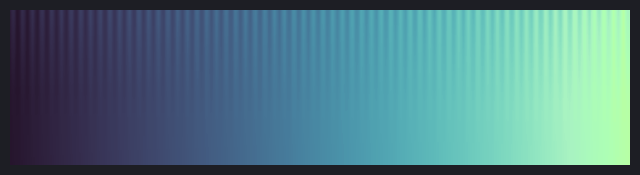

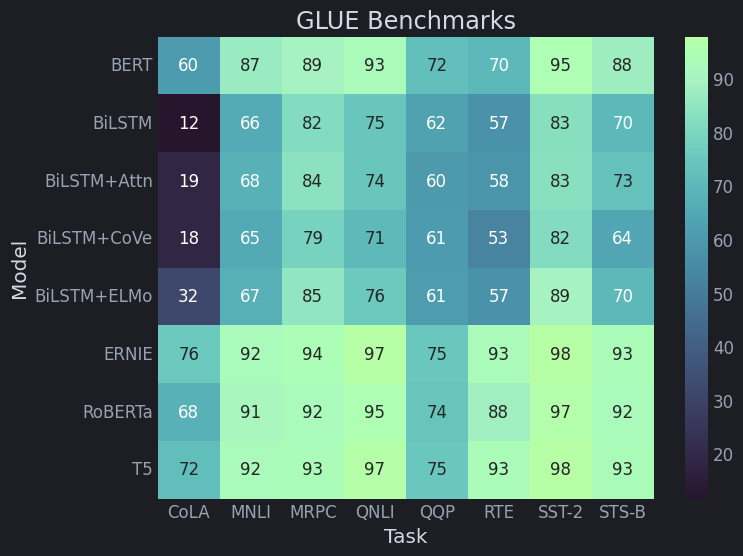

In [10]:
with plt.style.context(rp.mpl_setup(True, False)[0]):
    teeth_plot(rp.mpl_aquaria)
    plt.show()
    heatmap_plot(rp.mpl_aquaria)

While these colormaps have more drastic changes than the ones intended for scatterplots, they're still not as extreme as they could be. For many applications, like the above heatmaps with annotations, the aesthetic appeal of the colors are important in addition to how precisely they show the data. Rho+ offers two choices if you just want the most extreme colormaps, fading from almost black to almost white. The warm version is `umbra`:

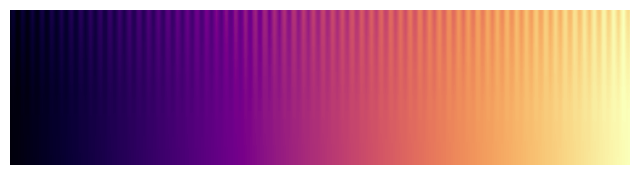

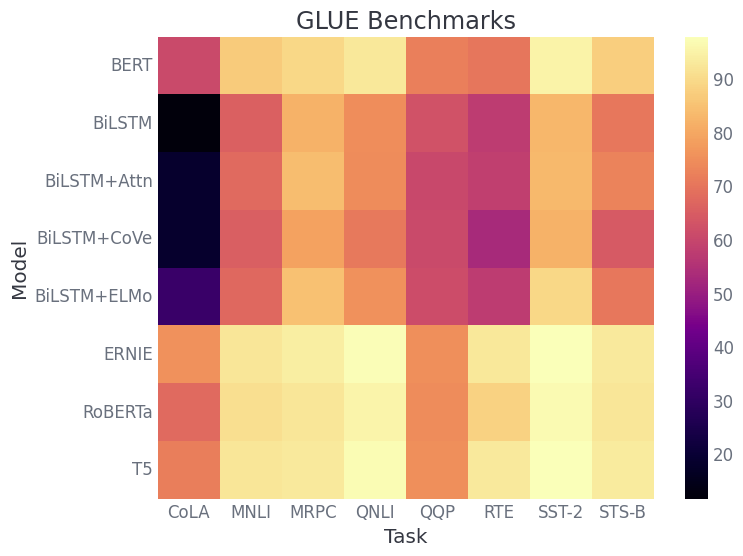

In [11]:
teeth_plot(rp.mpl_umbra)
plt.show()
heatmap_plot(rp.mpl_umbra, annot=False)

The cool version is `gouldia`, which is a version of Colorcet's `gouldian` map:

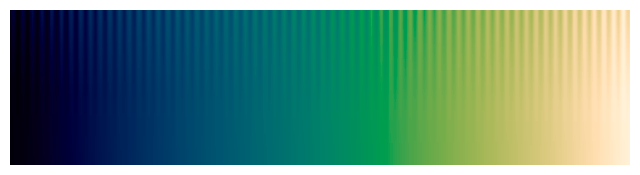

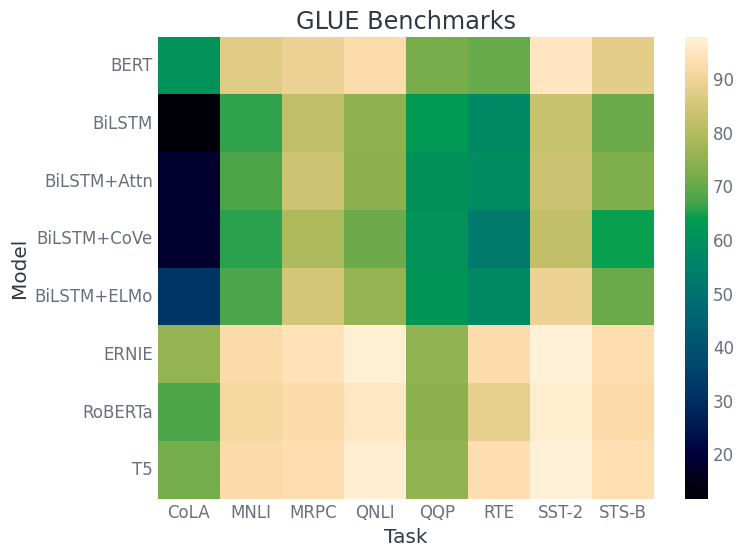

In [12]:
teeth_plot(rp.mpl_gouldia)
plt.show()
heatmap_plot(rp.mpl_gouldia, annot=False)

The improvement in resolution (as shown by the height of the teeth) is relatively minimal, so as a first choice `lava`, `candela`, `cabana`, and `aquaria` are preferable.

## Diverging Colormaps

Some data has a clear center, such that deviations on either side of that center should be clearly visible. This data is called *diverging*, and so `div_` is prepended to each of the color palette names to reflect that. Rho+ provides a set of classic blue-to-red palettes. If you don't know what to pick, use `rho_div_coolwarm_shift` in light mode and `rho_div_icefire_shift` in dark mode. These are similar to the Seaborn color palettes `coolwarm` and `icefire`, hence the names, and as the `_shift` implies they are not purely one hue of blue or red. This adds increased resolution compared to simply desaturating a single shade of either color.

Note that all of these schemes smooth out the middle: lightness follows more of a U shape than a V shape. (Note how, in the below comb plots, the grating is almost invisible in the middle.) This is generally recommended to avoid a false overemphasis of values near the middle, but it does mean that these palettes will not perform well if you have many values in the middle that you want to distinguish. Consider using Seaborn's `robust` option or a log scale in that case.

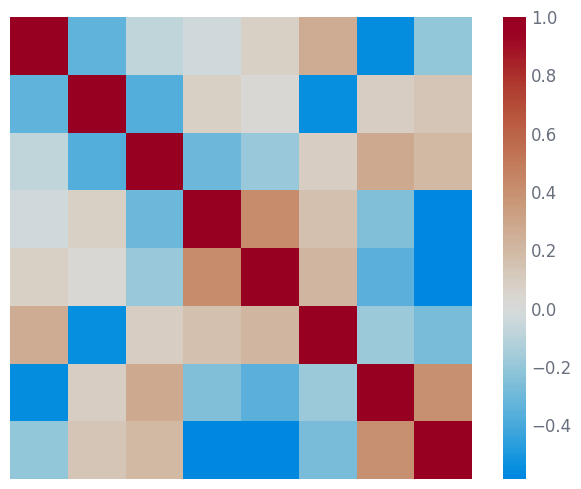

In [13]:
rp.mpl_setup(False)

def corr_map(palette):
    sns.heatmap(sns.load_dataset('titanic').corr(numeric_only=True), center=0, cmap=palette)

teeth_plot(rp.mpl_div_coolwarm_shift)
corr_map(rp.mpl_div_coolwarm_shift)

`icefire` reverses the lightness pattern and won't be as jarring when used in dark mode.

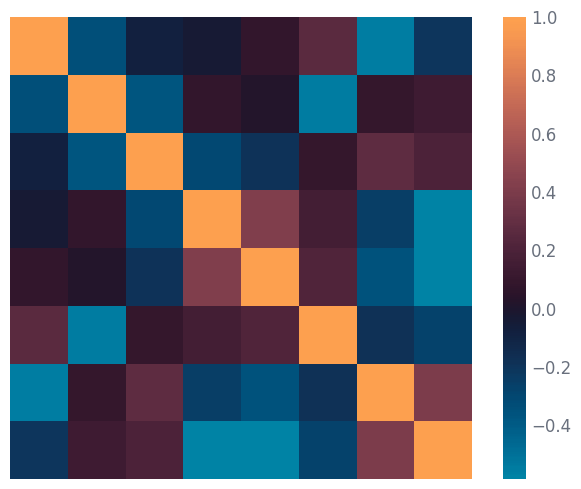

In [14]:
rp.mpl_setup(False)

teeth_plot(rp.mpl_div_icefire_shift)
corr_map(rp.mpl_div_icefire_shift)

Sometimes the extra hue shift can be distracting or unnecessarily saturated. As such, there are versions of both without the shift:

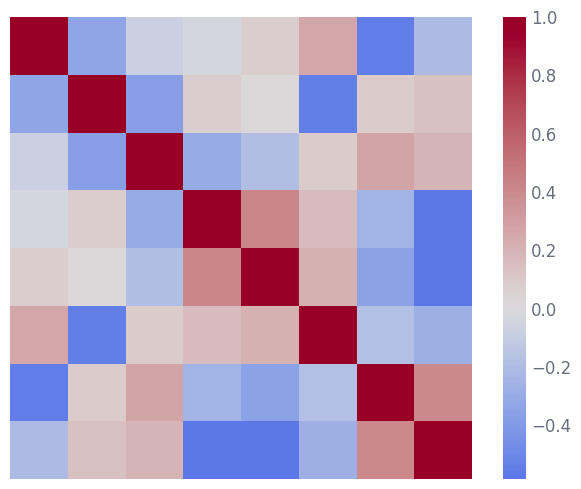

In [15]:
rp.mpl_setup(False)
teeth_plot(rp.mpl_div_coolwarm)
corr_map(rp.mpl_div_coolwarm)

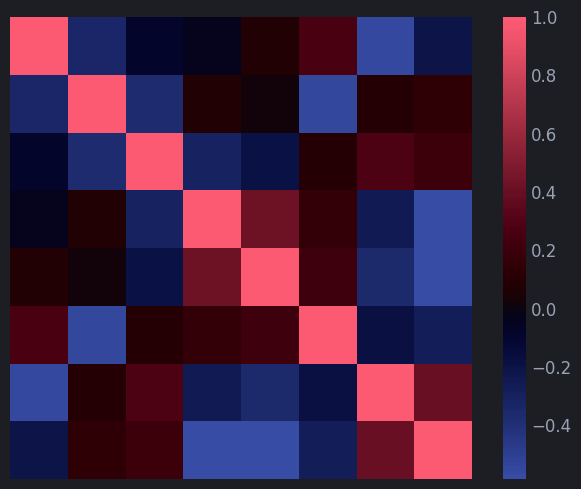

In [16]:
rp.mpl_setup(True)
teeth_plot(rp.mpl_div_icefire)
corr_map(rp.mpl_div_icefire)

There is also a diverging rainbow colormap in Rho+. This is not colorblind-safe and is not generally recommended, but if you want it you can use it. Note that yellow is the center (because it's the lightest color, so it has to be the center to ensure symmetry), which isn't how we normally think of the rainbow.

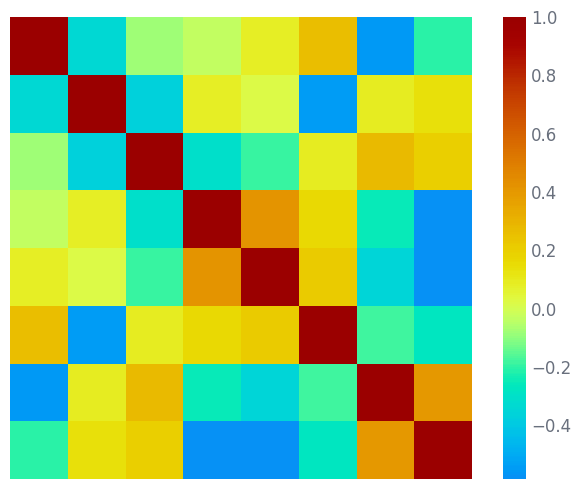

In [17]:
rp.mpl_setup(False)
teeth_plot(rp.mpl_div_spectra)
corr_map(rp.mpl_div_spectra)

## Harmonious Colormaps

Sometimes maximum information density is not important—perhaps color is redundant, or the marks being shaded are large and easy to tell apart. In that case, graphs can look nicer when the colors harmonize more, and so restricting the range of colors used can produce prettier plots. Rho+ has three such colormaps: `frutta`, `glacia`, and `ignia`. Use these when you don't need the resolution that `viridia` and `inferna` offer or you want your Instagram post to be more stylish. These are all colorblind-safe.

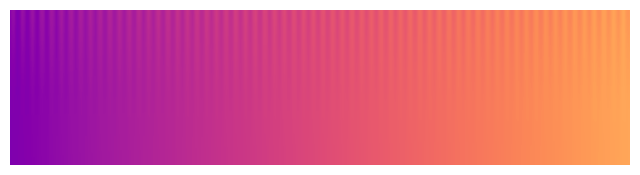

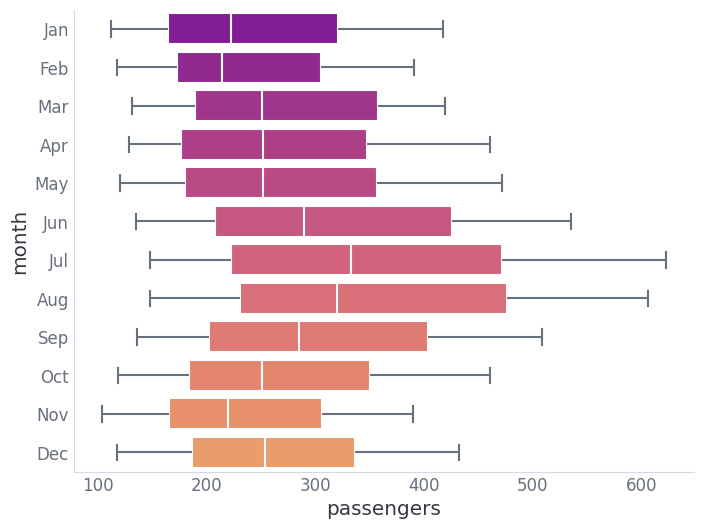

In [18]:
def boxplot(cmap):
    sns.boxplot(sns.load_dataset('flights'), x='passengers', hue='month', y='month', palette=cmap, **rp.boxstyle(), legend=False)

teeth_plot(rp.mpl_frutta)
plt.show()
boxplot('rho_frutta')

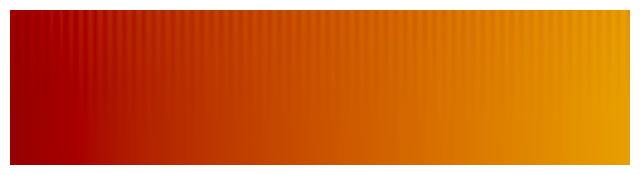

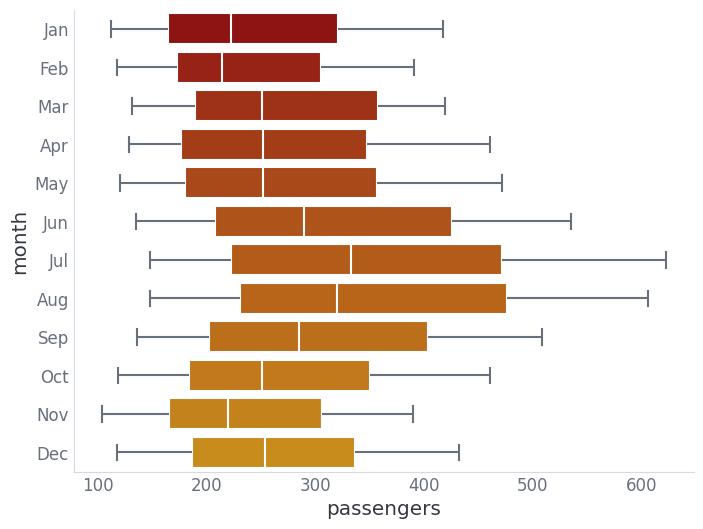

In [19]:
teeth_plot(rp.mpl_ignia)
plt.show()
boxplot('rho_ignia')

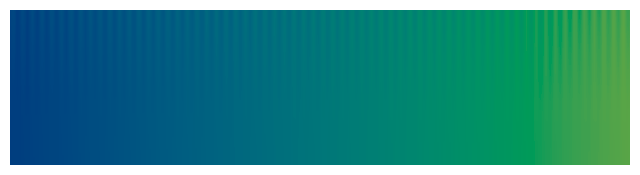

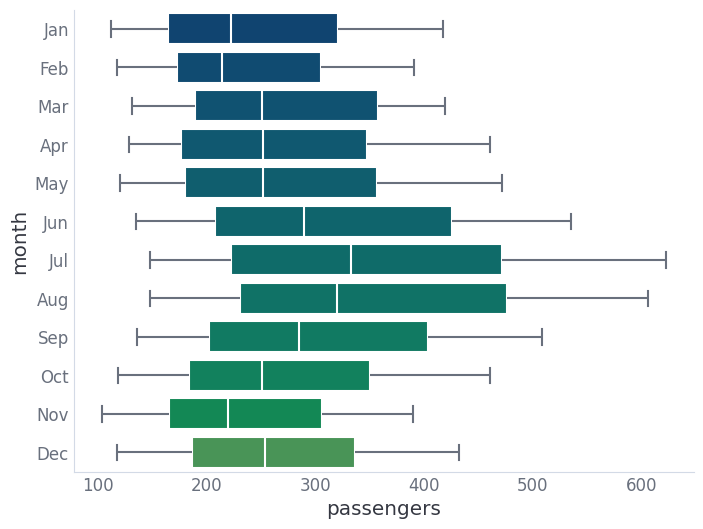

In [20]:
teeth_plot(rp.mpl_glacia)
plt.show()
boxplot('rho_glacia')

## Isoluminant Colormaps

When color distinguishability is not a concern (for instance, color is redundant or colors are in big blocks), using a colormap in which every color is the same luminance can make sure nothing stands out too much and can improve aesthetic appeal. Rho+ has three such colormaps: `iso_spectra`, `iso_glacia`, and `iso_frutta`. `iso_spectra` is the equivalent to Seaborn's `husl` and is usable to generate many different categories or when you want an equal-lightness rainbow colormap. Note the teeth plots here are far less distinct: at small scales, luminance is the primary way we distinguish color, and so not varying luminance results in a lot of lost resolution.

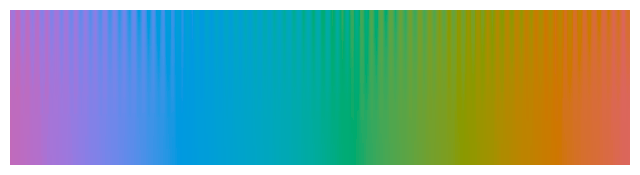

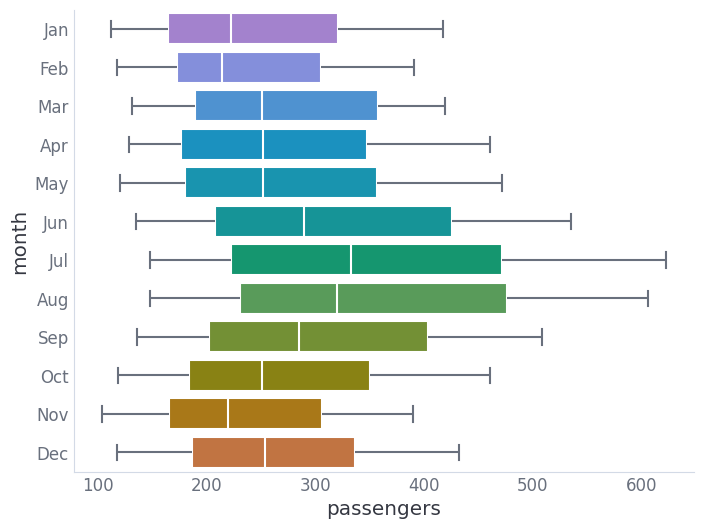

In [21]:
teeth_plot(rp.mpl_iso_spectra)
plt.show()
boxplot('rho_iso_spectra')

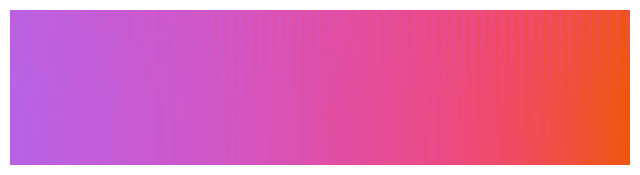

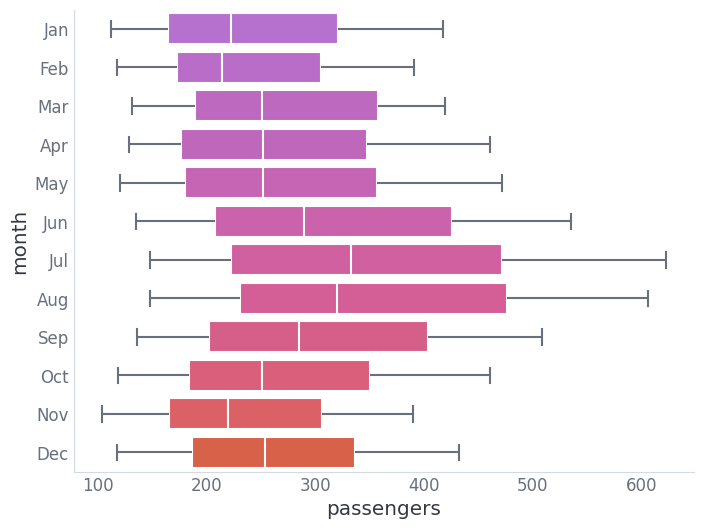

In [22]:
teeth_plot(rp.mpl_iso_frutta)
plt.show()
boxplot('rho_iso_frutta')

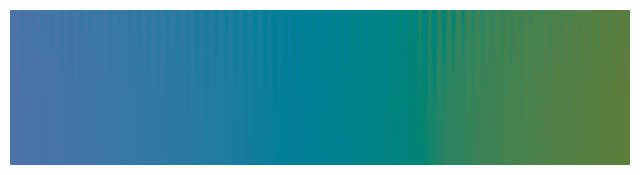

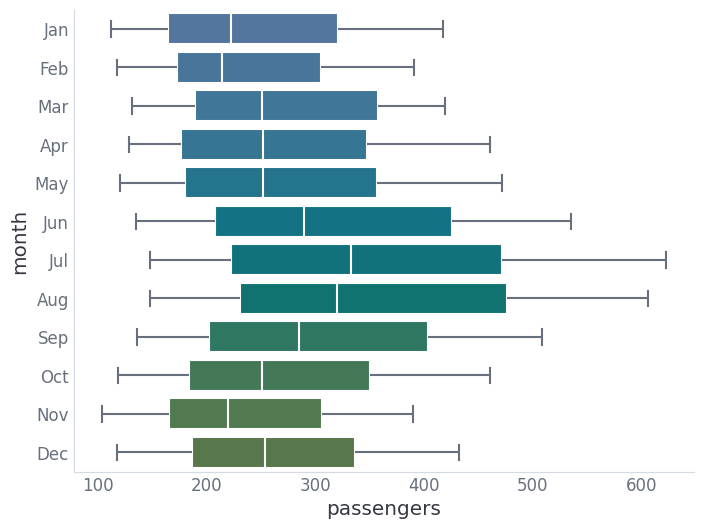

In [23]:
teeth_plot(rp.mpl_iso_glacia)
plt.show()
boxplot('rho_iso_glacia')

## Rainbow Colormap

Rainbow colormaps are not a good default for basically any data visualization application: they are often completely unusable for colorblind viewers, can make simple comparisons difficult, and generally perform less well in experiments than colormaps like the ones you've seen so far. But no palette library seems to be complete without one of these, and in some specific scenarios the extra resolution gained by using all of the available colors outweighs those downsides. Hence `spectra`, the rainbow colormap in Rho+. Use it as an alternative to `turbo` that is better than `jet`.

As a test image, I'll use the 3D depth image that [Google's `turbo` colormap](https://ai.googleblog.com/2019/08/turbo-improved-rainbow-colormap-for.html) used as a showcase. In such an image, it is often more important to quickly see if two objects are roughly the same depth than it is to compare differences (is this object closer to this one or that one?), and so the weaknesses of a rainbow colormap aren't as important. Note how "the green object" is more specific than it would be in other palettes: other colormaps don't have as many distinct names for each part of the map.

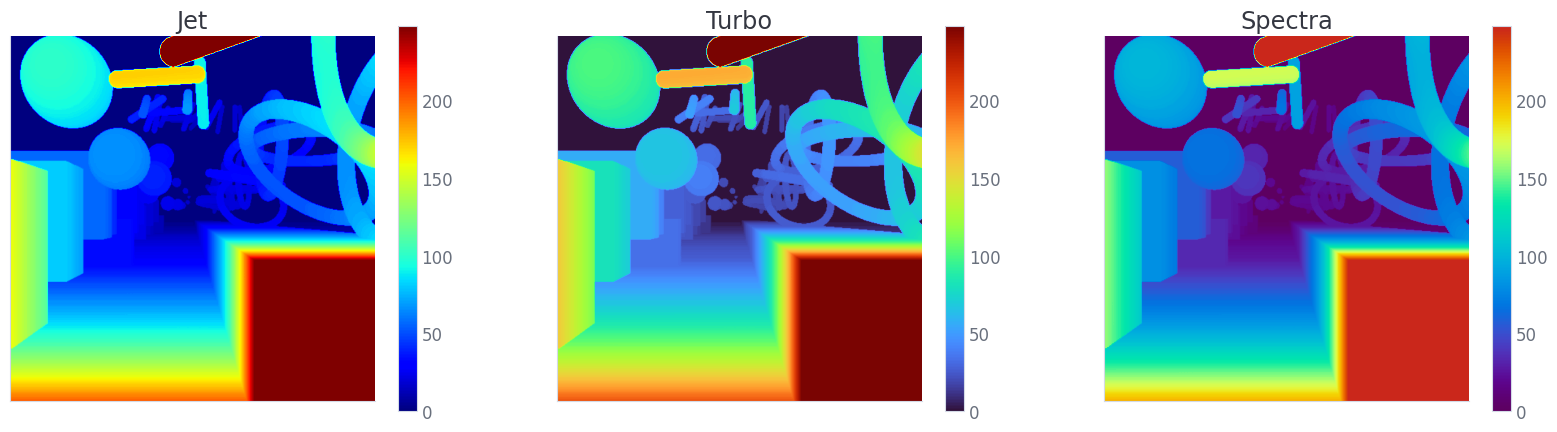

In [24]:
from PIL import Image
import urllib
import numpy as np


a = np.array(Image.open(urllib.request.urlopen('https://www.dropbox.com/s/zli2usov4su4ykg/depth-image.png?raw=1')))[:, :, 0]

fig, axs = plt.subplots(1, 3, figsize=(20, 5))

for ax, cmap, name in zip(axs, ('jet', 'turbo', 'rho_spectra'), ('Jet', 'Turbo', 'Spectra')):
    im = ax.imshow(a, cmap=cmap)
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)
    ax.set_title(name)
    fig.colorbar(im, ax=ax)